I. Thông thường ta thường xử lý các vấn đề sau về dữ liệu
1. Thiếu dòng tiêu đề ở file csv
2. Nhiều biến lưu ở một cột
3. Dữ liệu cột chứa các giá trị đơn vị không nhất quán
4. Dữ liệu có một dòng trống
5. Dữ liệu có các dòng trùng lặp
6. Các ký tự không phải ASCII
7. Giá trị bị mất
8. Tiêu đề cột là giá trị chứ không phải tên biến

In [72]:
import pandas as pd #Thư viện chính để xử lý và phân tích dữ liệu.

In [73]:
patientheartrate = pd.read_csv(r'patient_heart_rate.csv')
patientheartrate

#Câu lệnh 'patientheartrate = pd.read_csv(r'patient_heart_rate.csv')' dùng để đọc dữ liệu từ tập tin CSV có tên là 'patient_heart_rate.csv' và lưu nó vào biến 'patientheartrate'. 

,1,Mickéy Mousé,56,70kgs,72,69,71,-,-.1,-.2
0,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
1,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
2,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
3,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
4,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
5,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
6,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
patientheartrate.head(5)
#hiển thị 5 dòng đầu tiên của DataFrame 'patientheartrate'.

,1,Mickéy Mousé,56,70kgs,72,69,71,-,-.1,-.2
0,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
1,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
2,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
3,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
4,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72


1. Thiếu dòng tiêu đề ở file csv

In [75]:
column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]
#'column_names' là một danh sách (list) chứa các tên cột sẽ được sử dụng để đặt tên cho các cột trong tệp CSV.
#Các tên cột bao gồm: "ID" (Mã số), "Name" (Tên), "Age" (Tuổi), "Weight" (Cân nặng), "m0006", "m0612", "m1218", "f006", "f0612", "f1218".
patientheartrate = pd.read_csv('patient_heart_rate.csv', names = column_names)
#'pd.read_csv' là hàm của thư viện pandas dùng để đọc tệp CSV và chuyển nó thành một DataFrame (bảng dữ liệu).
#'patient_heart_rate.csv' là tên của tệp CSV chứa dữ liệu về nhịp tim của bệnh nhân.
#'names = column_names' chỉ định rằng các tên cột sẽ được lấy từ danh sách 'column_names' đã tạo ở trên.

In [76]:
patientheartrate.head(5)
#hiển thị 5 dòng đầu tiên của DataFrame 'patientheartrate'.

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


2. Nhiều biến lưu ở một cột

In [77]:
patientheartrate[['Firstname','Lastname']] = patientheartrate['Name'].str.split(expand=True)
#'patientheartrate['Name'].str.split(expand=True)' sẽ chia giá trị trong cột 'Name' thành một DataFrame mới, tách các từ theo khoảng trắng.
#'[['Firstname', 'Lastname']]' gán kết quả của phép tách này vào hai cột mới trong 'patientheartrate': 'Firstname' (tên đầu) và 'Lastname' (họ).
patientheartrate = patientheartrate.drop('Name', axis=1)
#'drop('Name', axis=1)' sẽ xóa cột 'Name' khỏi patientheartrate.
#'axis=1' chỉ định rằng ta đang xóa một cột (nếu là 'axis=0' thì là xóa một hàng).
print(patientheartrate)
#Lệnh 'print(patientheartrate)' sẽ in ra DataFrame 'patientheartrate' sau khi đã tách cột 'Name' và xóa cột này.

      ID   Age      Weight m0006 m0612 m1218 f006 f0612 f1218 Firstname  \
0    1.0  56.0       70kgs    72    69    71    -     -     -    Mickéy   
1    2.0  34.0   154.89lbs     -     -     -   85    84    76    Donald   
2    3.0  16.0         NaN     -     -     -   65    69    72      Mini   
3    4.0   NaN       78kgs    78    79    72    -     -     -   Scrooge   
4    5.0  54.0  198.658lbs     -     -     -   69   NaN    75      Pink   
5    6.0  52.0      189lbs     -     -     -   68    75    72      Huey   
6    7.0  19.0       56kgs     -     -     -   71    78    75     Dewey   
7    8.0  32.0       78kgs    78    76    75    -     -     -    Scööpy   
8    NaN   NaN         NaN   NaN   NaN   NaN  NaN   NaN   NaN       NaN   
9    NaN   NaN         NaN   NaN   NaN   NaN  NaN   NaN   NaN       NaN   
10   NaN   NaN         NaN   NaN   NaN   NaN  NaN   NaN   NaN       NaN   
11   9.0  52.0      189lbs     -     -     -   68    75    72      Huey   
12  10.0  12.0       45kg

3. Dữ liệu cột chứa các giá trị đơn vị không nhất quán

In [78]:
if 'weight' in patientheartrate.columns:
    weight=patientheartrate['weight']
    for i in range (0, len(weight)):
        x= str(weight[i])
        if "lbs" in x [-3:]:
            x = x [:-3:]
            float_x = float(x)
            y = int(float_x/2.2)
            y = str(y)+"kgs"
            weight[i]=y
print(patientheartrate.columns)
#Lấy cột 'weight' từ DataFrame 'patientheartrate' và gán cho biến 'weight'.
#Sử dụng vòng lặp 'for' để duyệt qua từng phần tử trong cột 'weight'.
#Chuyển giá trị của phần tử hiện tại thành chuỗi và gán cho biến 'x'.
#Kiểm tra nếu ba ký tự cuối cùng của chuỗi 'x' là "lbs":
#Nếu đúng, loại bỏ ba ký tự cuối của chuỗi 'x' (để chỉ giữ lại phần số).
#Chuyển đổi chuỗi số này thành kiểu float và gán cho 'float_x'.
#Chuyển đổi từ pounds sang kilograms bằng cách chia 'float_x' cho 2.2, rồi chuyển đổi kết quả thành kiểu int và gán cho 'y'.
#Chuyển 'y' thành chuỗi và thêm "kgs" vào cuối.
#Cập nhật giá trị của phần tử hiện tại trong cột 'weight' bằng giá trị mới 'y'.

Index(['ID', 'Age', 'Weight', 'm0006', 'm0612', 'm1218', 'f006', 'f0612',
       'f1218', 'Firstname', 'Lastname'],
      dtype='object')


In [79]:
patientheartrate.head(5)
#hiển thị 5 dòng đầu tiên của DataFrame 'patientheartrate'.

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


4. Dữ liệu có một dòng trống

In [80]:
patientheartrate.dropna(how="all", inplace=True)
print(patientheartrate)
#'dropna(how="all", inplace=True)': Lệnh này sẽ xóa các hàng mà tất cả các giá trị trong hàng đó đều là 'NaN'.
#'inplace=True': Tham số này chỉ ra rằng việc thay đổi sẽ được áp dụng trực tiếp lên DataFrame 'patientheartrate' mà không cần tạo ra một bản sao mới.
#lệnh 'print(patientheartrate)' sẽ in ra DataFrame 'patientheartrate' sau khi đã loại bỏ các hàng có tất cả các giá trị là 'NaN'.

      ID   Age      Weight m0006 m0612 m1218 f006 f0612 f1218 Firstname  \
0    1.0  56.0       70kgs    72    69    71    -     -     -    Mickéy   
1    2.0  34.0   154.89lbs     -     -     -   85    84    76    Donald   
2    3.0  16.0         NaN     -     -     -   65    69    72      Mini   
3    4.0   NaN       78kgs    78    79    72    -     -     -   Scrooge   
4    5.0  54.0  198.658lbs     -     -     -   69   NaN    75      Pink   
5    6.0  52.0      189lbs     -     -     -   68    75    72      Huey   
6    7.0  19.0       56kgs     -     -     -   71    78    75     Dewey   
7    8.0  32.0       78kgs    78    76    75    -     -     -    Scööpy   
11   9.0  52.0      189lbs     -     -     -   68    75    72      Huey   
12  10.0  12.0       45kgs     -     -     -   92    95    87     Louie   
13  11.0   NaN       60kgs    78    75    72    -     -     -     Henry   
14  12.0  34.0         NaN    65    67    55    -     -     -    Michel   
15  13.0   NaN         Na

5. Dữ liệu có các dòng trùng lặp

In [81]:
patientheartrate = patientheartrate.drop_duplicates(subset=['Firstname','Lastname', 'Age', 'Weight'])
#Xóa các hàng trùng lặp trong DataFrame 'patientheartrate' dựa trên các cột 'Firstname', 'Lastname', 'Age', và 'Weight'.

In [82]:
print(patientheartrate)
#In ra DataFrame 'patientheartrate' sau khi đã xóa các hàng trùng lặp.

      ID   Age      Weight m0006 m0612 m1218 f006 f0612 f1218 Firstname  \
0    1.0  56.0       70kgs    72    69    71    -     -     -    Mickéy   
1    2.0  34.0   154.89lbs     -     -     -   85    84    76    Donald   
2    3.0  16.0         NaN     -     -     -   65    69    72      Mini   
3    4.0   NaN       78kgs    78    79    72    -     -     -   Scrooge   
4    5.0  54.0  198.658lbs     -     -     -   69   NaN    75      Pink   
5    6.0  52.0      189lbs     -     -     -   68    75    72      Huey   
6    7.0  19.0       56kgs     -     -     -   71    78    75     Dewey   
7    8.0  32.0       78kgs    78    76    75    -     -     -    Scööpy   
12  10.0  12.0       45kgs     -     -     -   92    95    87     Louie   
13  11.0   NaN       60kgs    78    75    72    -     -     -     Henry   
14  12.0  34.0         NaN    65    67    55    -     -     -    Michel   
15  13.0   NaN         NaN     -     -     -   68    72    70      Tana   
16  14.0   NaN         Na

6. Các ký tự không phải ASCII

In [83]:
patientheartrate['Firstname'] = patientheartrate['Firstname'].replace({r'[^\x00-\x7F]+':''}, regex=True)
#'patientheartrate['Firstname']': Truy cập vào cột 'Firstname' của DataFrame.
#'.replace({r'[^\x00-\x7F]+':''}, regex=True)': Thay thế tất cả các ký tự không phải ASCII bằng chuỗi rỗng. 
# Tham số 'regex=True' cho biết rằng 'replace' đang sử dụng biểu thức chính quy.
patientheartrate.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#'patientheartrate.Firstname': Truy cập vào cột 'Firstname' của DataFrame.
#'.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)': Tương tự như dòng trên, nhưng thay đổi trực tiếp trong DataFrame mà không cần gán lại.
print(patientheartrate)
#'print(patientheartrate)': In ra DataFrame sau khi các thay đổi đã được áp dụng.

      ID   Age      Weight m0006 m0612 m1218 f006 f0612 f1218 Firstname  \
0    1.0  56.0       70kgs    72    69    71    -     -     -     Micky   
1    2.0  34.0   154.89lbs     -     -     -   85    84    76    Donald   
2    3.0  16.0         NaN     -     -     -   65    69    72      Mini   
3    4.0   NaN       78kgs    78    79    72    -     -     -   Scrooge   
4    5.0  54.0  198.658lbs     -     -     -   69   NaN    75      Pink   
5    6.0  52.0      189lbs     -     -     -   68    75    72      Huey   
6    7.0  19.0       56kgs     -     -     -   71    78    75     Dewey   
7    8.0  32.0       78kgs    78    76    75    -     -     -      Scpy   
12  10.0  12.0       45kgs     -     -     -   92    95    87     Louie   
13  11.0   NaN       60kgs    78    75    72    -     -     -     Henry   
14  12.0  34.0         NaN    65    67    55    -     -     -    Michel   
15  13.0   NaN         NaN     -     -     -   68    72    70      Tana   
16  14.0   NaN         Na

C:\Users\Admin\AppData\Local\Temp\ipykernel_15596\3844229668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patientheartrate.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)


7. Giá trị bị mất

In [84]:
index_ageweightnull = patientheartrate[patientheartrate['Age'].isna() & patientheartrate['Weight'].isna()].index
index_ageweightnull
#'patientheartrate['Age'].isna()': Đoạn mã này kiểm tra cột 'Age' của DataFrame 'patientheartrate' để tìm các giá trị bị thiếu (NaN).
#'patientheartrate['Weight'].isna()': đoạn mã này kiểm tra cột 'Weight' để tìm các giá trị bị thiếu, trả về một Series boolean.
#'&':Dấu & dùng để thực hiện phép toán 'AND' giữa hai Series boolean, nghĩa là chỉ những hàng mà cả hai điều kiện đều 'True' 
# (cả hai cột 'Age' và 'Weight' đều có giá trị bị thiếu) mới được chọn.
#'patientheartrate['Age'].isna() & patientheartrate['Weight'].isna()': Kết quả là một Series boolean kết hợp, xác định những hàng mà cả hai giá trị 'Age' và 'Weight' đều bị thiếu.
#'patientheartrate[...]': Đoạn mã này chọn các hàng trong DataFrame patientheartrate dựa trên điều kiện trong dấu ngoặc vuông.
#'.index': Lấy chỉ mục (index) của các hàng thoả mãn điều kiện.

Index([15, 16], dtype='int64')

In [85]:
patientheartrate.drop(index_ageweightnull, inplace=True)
#Xóa dòng không có giá trị index ('index_ageweightnull'): xóa các dòng trong DataFrame có giá trị index là 'index_ageweightnull'

In [86]:
patientheartrate['Age'].fillna(patientheartrate['Age'].mean(), inplace =False)
#Điền giá trị trung bình vào cột 'Age': Để điền giá trị trung bình của cột 'Age' vào những ô trống, bạn có thể sử dụng phương thức 'fillna'. 

0     56.0
1     34.0
2     16.0
3     36.1
4     54.0
5     52.0
6     19.0
7     32.0
12    12.0
13    36.1
14    34.0
17    52.0
Name: Age, dtype: float64

8. Tiêu đề cột là giá trị chứ không phải tên biến

In [87]:
patientheartrate
#hiển thị thông tin đầy đủ của DataFrame 'patientheartrate'.

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,189lbs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
12,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
13,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


In [88]:
patientheartrate = pd.melt(patientheartrate, id_vars=['ID', 'Age', 'Weight', 'Firstname', 'Lastname'], value_name="PulseRate",var_name="sex_and_time").sort_values(['ID', 'Age', 'Weight', 'Firstname', 'Lastname'])
#'pd.melt(patientheartrate, id_vars=['ID', 'Age', 'Weight', 'Firstname', 'Lastname'], value_name="PulseRate", var_name="sex_and_time")': Hàm 'melt' được dùng để biến đổi cấu trúc của DataFrame.
#'.sort_values(['ID', 'Age', 'Weight', 'Firstname', 'Lastname'])': Sau khi thực hiện 'melt', dữ liệu sẽ được sắp xếp dựa trên các cột ID, Age, Weight, Firstname, Lastname để có thứ tự dữ liệu chính xác hơn.

In [89]:
len(patientheartrate['PulseRate'])
#Câu lệnh "len(patientheartrate['PulseRate'])" dùng để đếm số lượng phần tử trong cột 'PulseRate' của DataFrame 

72

In [90]:
patientheartrate.head(10)
#hiển thị 10 dòng đầu tiên của DataFrame 'patientheartrate'.

,ID,Age,Weight,Firstname,Lastname,sex_and_time,PulseRate
0,1.0,56.0,70kgs,Micky,Mousé,m0006,72
12,1.0,56.0,70kgs,Micky,Mousé,m0612,69
24,1.0,56.0,70kgs,Micky,Mousé,m1218,71
36,1.0,56.0,70kgs,Micky,Mousé,f006,-
48,1.0,56.0,70kgs,Micky,Mousé,f0612,-
60,1.0,56.0,70kgs,Micky,Mousé,f1218,-
1,2.0,34.0,154.89lbs,Donald,Duck,m0006,-
13,2.0,34.0,154.89lbs,Donald,Duck,m0612,-
25,2.0,34.0,154.89lbs,Donald,Duck,m1218,-
37,2.0,34.0,154.89lbs,Donald,Duck,f006,85


In [91]:
tmp_patientheartrate= patientheartrate["sex_and_time"].str.extract("(\D)(\d+)(\d{2})", expand=True)
#'patientheartrate["sex_and_time"].str.extract("(\D)(\d+)(\d{2})", expand=True)': Đoạn này sử dụng phương thức 'str.extract()' để trích xuất thông tin từ cột "sex_and_time".

In [92]:
tmp_patientheartrate.columns=["Sex","hours_lower","hours_upper"]
#'tmp_patientheartrate.columns=["Sex","hours_lower","hours_upper"]': Đoạn này đổi tên các cột của 'tmp_patientheartrate' để phù hợp với các tên đã chỉ định.

In [93]:
tmp_patientheartrate["Time"]=tmp_patientheartrate["hours_lower"] + "-"+ tmp_patientheartrate["hours_upper"]
#'tmp_patientheartrate["Time"]=tmp_patientheartrate["hours_lower"] + "-"+ tmp_patientheartrate["hours_upper"]': Tạo cột "Time" bằng cách kết hợp các cột "hours_lower" và
# "hours_upper", tạo thành một dải thời gian.

In [94]:
patientheartrate =pd.concat([patientheartrate, tmp_patientheartrate], axis=1)
#'patientheartrate =pd.concat([patientheartrate, tmp_patientheartrate], axis=1)': Nối 'tmp_patientheartrate' vào 'patientheartrate' theo chiều cột.

In [95]:
patientheartrate = patientheartrate.drop(['sex_and_time','hours_lower','hours_upper'], axis=1)
#'patientheartrate = patientheartrate.drop(['sex_and_time','hours_lower','hours_upper'], axis=1)': Loại bỏ các cột không cần thiết sau khi đã xử lý.
patientheartrate = patientheartrate.dropna()
#'patientheartrate = patientheartrate.dropna()': Loại bỏ các dòng có giá trị NaN (nếu có).

In [96]:
len(patientheartrate['PulseRate'])
#'len(patientheartrate['PulseRate'])': Đoạn này tính chiều dài của cột 'PulseRate' trong 'patientheartrate'.

41

In [97]:
patientheartrate.head(10)
#hiển thị 10 dòng đầu tiên của DataFrame 'patientheartrate'.

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mousé,72,m,00-06
12,1.0,56.0,70kgs,Micky,Mousé,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mousé,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mousé,-,f,0-06
48,1.0,56.0,70kgs,Micky,Mousé,-,f,06-12
60,1.0,56.0,70kgs,Micky,Mousé,-,f,12-18
1,2.0,34.0,154.89lbs,Donald,Duck,-,m,00-06
13,2.0,34.0,154.89lbs,Donald,Duck,-,m,06-12
25,2.0,34.0,154.89lbs,Donald,Duck,-,m,12-18
37,2.0,34.0,154.89lbs,Donald,Duck,85,f,0-06


11. Hãy khảo sát tỉ lệ dữ liệu thiếu trên biến huyết áp. Dữ liệu bị thiếu thì hãy xử lý bằng
phương pháp sau
1. Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không
được thì dùng 2)
2. Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được
thì dùng 3)
3. Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì
dùng 4)
4. Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5).
5. Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng
6)
6. Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định
trong y học. 

<Axes: >

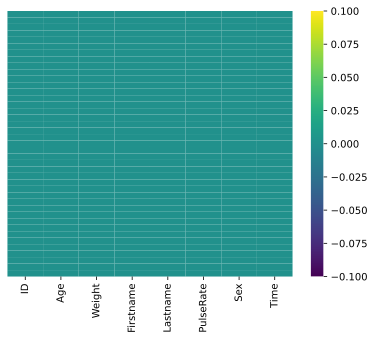

In [98]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')
#'import seaborn as sns': Import thư viện Seaborn để vẽ đồ thị.
#'%matplotlib inline': Dòng này chỉ định cho Jupyter Notebook để hiển thị đồ thị ngay trong notebook mà không cần gọi 'plt.show()'.
#'%config InlineBackend.figure_format = 'svg'': Định cấu hình định dạng hình ảnh để sử dụng định dạng vector SVG cho hình vẽ.
#'sns.heatmap(patientheartrate.isna(), yticklabels=False, cbar=True, cmap='viridis''):
#'sns.heatmap(...)': Tạo biểu đồ heatmap.
#'patientheartrate.isna()': Tạo một DataFrame mới có cùng kích thước với 'patientheartrate', nhưng các ô sẽ là 'True' nếu giá trị tương ứng là NaN và 'False' nếu không phải.
#'yticklabels=False': Không hiển thị nhãn trục y.
#'cbar=True':' Hiển thị color bar bên cạnh biểu đồ heatmap.
#'cmap='viridis'': Sử dụng màu sắc từ palette 'viridis' của matplotlib cho biểu đồ.

In [99]:
patientheartrate['PulseRate'] = patientheartrate['PulseRate'].replace({'-': '0'}, regex=True)
patientheartrate['PulseRate'] = patientheartrate['PulseRate'].fillna('0')
print(len(patientheartrate['PulseRate']))
#'patientheartrate['PulseRate'] = patientheartrate['PulseRate'].replace({'-': '0'}, regex=True)': Dòng này thay thế các ký tự "-" trong cột 'PulseRate' của DataFrame 
# 'patientheartrate' thành "0". 
#'patientheartrate['PulseRate'] = patientheartrate['PulseRate'].fillna('0')': Dòng này điền các giá trị NaN (không có giá trị) trong cột 'PulseRate' bằng "0".
#'print(len(patientheartrate['PulseRate']))': Dòng này in ra độ dài (số lượng phần tử) của cột 'PulseRate' trong DataFrame 'patientheartrate'.


41


In [101]:
def avgPulserate(patientheartrate, firstname):
  sumPulserate = 0
  nsumPulserate = 0
  for i, value in enumerate(patientheartrate['Firstname']):  # Lặp qua từng dòng trong DataFrame
    if value == firstname:
      try:
        if patientheartrate['PulseRate'][i] !='0': # Kiểm tra giá trị nhịp tim khác '0' và là số
          sumPulserate += int(patientheartrate['PulseRate'].values[i])
          nsumPulserate += 1
      except:
        pass
  if nsumPulserate > 0:   # Tính trung bình nhịp tim nếu có dữ liệu hợp lệ
    return str(sumPulserate/nsumPulserate)
  else:
    return 0  # Trả về '0' nếu không có dữ liệu hợp lệ

In [105]:
def isValidIndex1(index, nrows):
  return index - 1 > 0 & index + 1 < nrows
#kiểm tra xem index có hợp lệ không trong một DataFrame có số hàng là nrows. Điều kiện là index phải lớn hơn 1 và nhỏ hơn nrows.

In [106]:
def isValidIndex2(index, nrows):
  return index + 1 < nrows & index + 2 < nrows
#kiểm tra xem index có hợp lệ không trong một DataFrame có số hàng là nrows. Điều kiện là index phải lớn hơn 2 và nhỏ hơn nrows.

In [107]:
def isPulseRateNotNull1(index, patientheartrate):
  return str(patientheartrate['PulseRate'].values[index-1])!= '0' and str(patientheartrate['PulseRate'].values[index+1])!= '0'
#'isPulseRateNotNull1(index, patientheartrate)':
#Hàm này kiểm tra xem giá trị 'PulseRate' tại 'index-1' và 'index+1' của DataFrame 'patientheartrate' có khác '0' không.
#Nếu giá trị là '0' thì hàm trả về False, ngược lại trả về True

In [108]:
def isPulseRateNotNull2(index, patientheartrate):
  return str(patientheartrate['PulseRate'].values[index+1])!= '0' and str(patientheartrate['PulseRate'].values[index +2])!= '0'
#'isPulseRateNotNull2(index, patientheartrate)':Tương tự như hàm trên, nhưng kiểm tra tại index+1 và index+2.

In [109]:
def isInGroup1(patientheartrate, index, firstname):
  return patientheartrate['Firstname'].values[index-1]== firstname and patientheartrate['Firstname'].values[index +1]== firstname
#'isInGroup1(patientheartrate, index, firstname)':
#Hàm này kiểm tra xem 'firstname' có xuất hiện tại index-1 và index+1 trong cột 'Firstname' của 'patientheartrate' hay không.
#Nếu cả hai điều kiện đều đúng, hàm trả về True, ngược lại trả về False.

In [110]:
def isInGroup1(patientheartrate, index, firstname):
  return patientheartrate['Firstname'].values[index-1]== firstname and patientheartrate['Firstname'].values[index +1]== firstname
#'isInGroup1(patientheartrate, index, firstname)':
#Hàm này kiểm tra xem 'firstname' có xuất hiện tại index-1 và index+1 trong cột 'Firstname' của 'patientheartrate' hay không.
#Nếu cả hai điều kiện đều đúng, hàm trả về True, ngược lại trả về False.

In [111]:
def updatePulseRatena (index, patientheartrate):
  nrows = len(patientheartrate['PulseRate']) -2
  newvalue = ''
  firstname = patientheartrate['Firstname'].values[index]
  try:
    if isValidIndex1(index,nrows) & isPulseRateNotNull1(index, patientheartrate) & isInGroup1(patientheartrate, index, firstname):
      try: 
        newvalue = (int(patientheartrate['PulseRate'].values[index-1]) + int(patientheartrate['PulseRate'].values[index+1]))/2
      except:
        newvalue = '0'
    elif isValidIndex2(index,nrows) & isPulseRateNotNull2(index, patientheartrate) & isInGroup2(patientheartrate, index, firstname):
      try:
        newvalue = (int(patientheartrate['PulseRate'].values[index-1]) + int(patientheartrate['PulseRate'].values[index+1]))/2
      except:
        newvalue ='0'
    else:
      newvalue = avgPulserate(patientheartrate, firstname)
  except:
      newvalue = avgPulserate(patientheartrate, firstname)
  finally:
    pass
  return newvalue
#'index': Chỉ số của bệnh nhân trong dữ liệu.
#'patientheartrate': DataFrame chứa dữ liệu về nhịp tim của các bệnh nhân, bao gồm các cột như 'Firstname' (tên bệnh nhân) và 'PulseRate' (nhịp tim).
#'nrows': Số hàng trong DataFrame dữ liệu nhịp tim của bệnh nhân trừ đi 2.
#'newvalue': Biến lưu giá trị nhịp tim mới được tính toán.
#'firstname': Tên của bệnh nhân tại chỉ số 'index'.
#Các hàm hỗ trợ như 'isValidIndex1', 'isPulseRateNotNull1', 'isInGroup1', 'isValidIndex2', 'isPulseRateNotNull2', 'isInGroup2',
#và 'avgPulserate' được sử dụng để kiểm tra và tính toán giá trị nhịp tim mới dựa trên các điều kiện nhất định.

In [112]:
len(patientheartrate["PulseRate"])
#trả về số lượng hàng (số lượng giá trị) trong cột 'PulseRate'.

41

In [113]:
pulserateupdate = []
for index, value in enumerate(patientheartrate["PulseRate"]):
  if value =='0' or value == '':
    newvalue = updatePulseRatena(index,patientheartrate)
    pulserateupdate.append(newvalue)
  else:
    pulserateupdate.append(value)
#Khởi tạo danh sách 'pulserateupdate': Đây là một danh sách rỗng ban đầu để lưu trữ các giá trị nhịp tim đã được cập nhật.
#Vòng lặp 'for' với 'enumerate': Vòng lặp này duyệt qua từng cặp chỉ số và giá trị của cột "PulseRate" trong DataFrame 'patientheartrate'.
#Kiểm tra giá trị rỗng: Dòng điều kiện 'if value =='0' or value == ''' kiểm tra nếu giá trị nhịp tim là '0' hoặc rỗng ('').
#Cập nhật giá trị: Nếu giá trị nhịp tim là '0' hoặc rỗng, hàm 'updatePulseRatena(index, patientheartrate)' được gọi để cập nhật giá trị thay thế và gán vào biến 'newvalue'.
#Thêm giá trị vào danh sách: Dùng phương thức 'append()' để thêm giá trị mới ('newvalue' hoặc giá trị ban đầu 'value' nếu không cần cập nhật) vào danh sách 'pulserateupdate'.
#Kết quả cuối cùng: Sau khi vòng lặp kết thúc, 'pulserateupdate' sẽ chứa danh sách các giá trị nhịp tim đã được cập nhật hoặc giữ nguyên.

In [114]:
patientheartrate["PulseRateUpdate"] = pulserateupdate
#'patientheartrate': là DataFrame chứa dữ liệu của bạn, được tạo và quản lý bởi 'pandas'.
#'"PulseRateUpdate"': là tên của cột mà bạn muốn gán giá trị từ biến 'pulserateupdate'.
#'pulserateupdate': là biến chứa giá trị mới bạn muốn thêm vào cột '"PulseRateUpdate"'.

In [115]:
len(patientheartrate["PulseRateUpdate"])
#trả về số lượng phần tử trong cột "PulseRateUpdate" của dataframe 'patientheartrate'.

41

In [117]:
patientheartrate
#hiển thị thông tin đầy đủ của DataFrame 'patientheartrate'.

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time,PulseRateUpdate
0,1.0,56.0,70kgs,Micky,Mousé,72,m,00-06,72
12,1.0,56.0,70kgs,Micky,Mousé,69,m,06-12,69
24,1.0,56.0,70kgs,Micky,Mousé,71,m,12-18,71
36,1.0,56.0,70kgs,Micky,Mousé,0,f,0-06,72.0
48,1.0,56.0,70kgs,Micky,Mousé,0,f,06-12,72.0
60,1.0,56.0,70kgs,Micky,Mousé,0,f,12-18,72.0
1,2.0,34.0,154.89lbs,Donald,Duck,0,m,00-06,0.0
13,2.0,34.0,154.89lbs,Donald,Duck,0,m,06-12,0.0
25,2.0,34.0,154.89lbs,Donald,Duck,0,m,12-18,0.0
37,2.0,34.0,154.89lbs,Donald,Duck,85,f,0-06,85
